<a href="https://colab.research.google.com/github/AnaghaKRadhakrishnan/PRODIGY_ML_02/blob/ML_TASK_02/ML_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')


Preview the dataset

In [4]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Remove unnecessary columns

In [5]:
df = df.drop(columns=['CustomerID'])

Check for missing values

In [6]:
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Convert categorical column

In [8]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

Standardize the features using StandardScaler

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Determine the Optimal Number of Clusters

In [10]:
inertia = []
K_range = range(1, 11)  # Test for cluster numbers from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)



Plot the Elbow Method


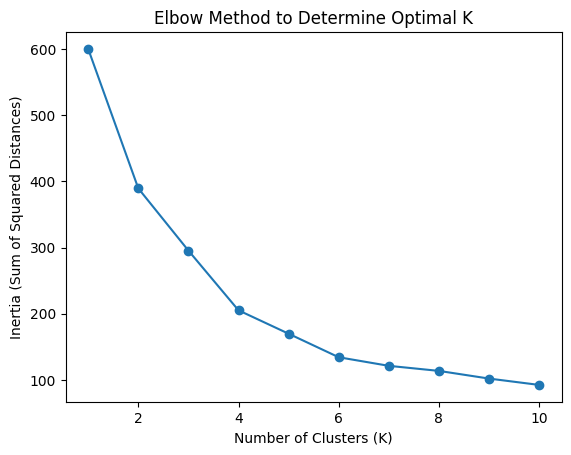

In [11]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

Apply K-means

In [12]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


Analyze the Clusters

In [13]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)
print("\nCluster Centers (Feature Means per Cluster):")
print(cluster_centers)


Cluster Centers (Feature Means per Cluster):
         Age  Annual Income (k$)  Spending Score (1-100)
0  55.275862           47.620690               41.706897
1  32.875000           86.100000               81.525000
2  25.769231           26.115385               74.846154
3  26.733333           54.311111               40.911111
4  44.387097           89.774194               18.483871


Display the customers with their cluster assignments

In [14]:
print("\nCustomer Clusters:")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())


Customer Clusters:
   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        2
1   21                  15                      81        2
2   20                  16                       6        3
3   23                  16                      77        2
4   31                  17                      40        2


Visualize the Clusters

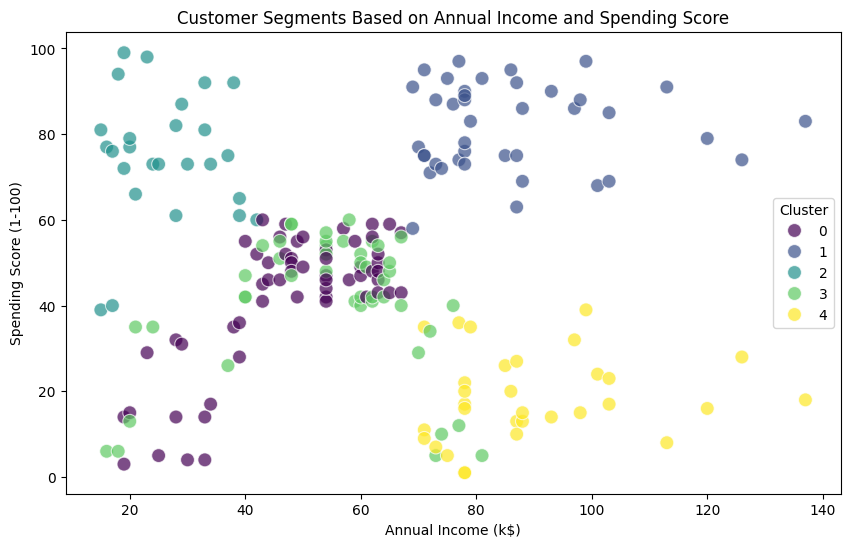

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()